In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h_data = pd.read_csv("C:/Users/LENOVO i5/Downloads/HousingData.csv")
h_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
h_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [3]:
h_data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
impu = SimpleImputer(strategy='mean')
impu.fit(h_data[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']])

SimpleImputer()

In [5]:
impu.statistics_

array([ 3.61187397, 11.21193416, 11.08399177,  0.06995885, 68.51851852,
       12.7154321 ])

In [6]:
impu_col=['CRIM','ZN','INDUS','CHAS','AGE','LSTAT'] 
h_data[impu_col] = impu.fit_transform(h_data[impu_col])
h_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
h_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='B'>

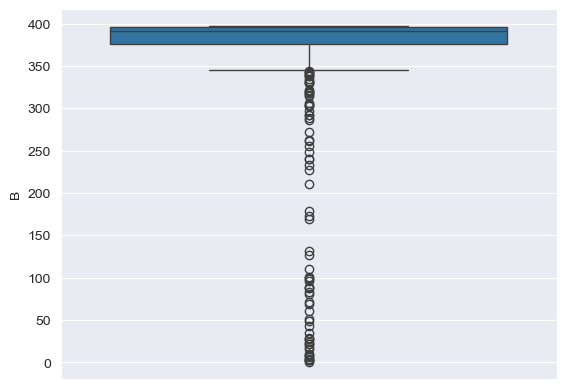

In [8]:
sns.set_style('darkgrid')
sns.boxplot(h_data,y = 'B')

In [9]:
import numpy as np
q1 = np.percentile(h_data['B'], 25, interpolation ='midpoint')
q3 = np.percentile(h_data['B'], 75, interpolation ='midpoint')

irq = q3-q1
lowerbound = q1-1.5*irq
upperbound = q1+1.5*irq

h_data.shape

(506, 14)

<Axes: ylabel='B'>

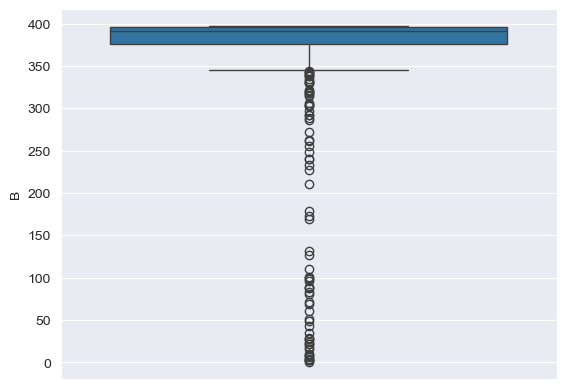

In [10]:
sns.set_style('darkgrid')
sns.boxplot(h_data,y = 'B')

In [11]:
h_data.info() # Check if there is a categorical value

# There is no categorical value in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
# Pridict house prices
x= h_data.drop(columns = 'MEDV')
y= h_data['MEDV']

x


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [13]:
# let's bring all columns into one scale in order to compare the data

from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()
scal.fit(x)

MinMaxScaler()

In [14]:
x[:] = scal.transform(x)
x

C:\Users\LENOVO i5\AppData\Local\Temp\ipykernel_4196\2700090224.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.04347826 0.04347826 0.08695652 0.08695652 0.08695652
 0.17391304 0.17391304 0.17391304 0.17391304 0.17391304 0.17391304
 0.17391304 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478
 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478
 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478
 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478 0.17391304
 0.17391304 0.17391304 0.17391304 0.08695652 0.08695652 0.08695652
 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652
 0.08695652 0.08695652 0.13043478 0.13043478 0.13043478 0.13043478
 0.08695652 0.17391304 0.04347826 0.17391304 0.30434783 0.30434783
 0.30434783 0.30434783 0.30434783 0.30434783 0.08695652 0.13043478
 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478 0.13043478
 0.13043

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [15]:
# Creating Training and testing dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [16]:
# We have trained set for the Linear Regression

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train) # fiting our training set to the Linear Regression


LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

In [20]:
y_pred[:5]
# the test vs the predicted values seems to be close but the values should not over shot nor undet shoot

array([29.14324958, 36.53566752, 14.49251294, 25.08111038, 18.45609233])

In [21]:
# let try and see how for our
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) 

3.1499233573458025

In [22]:
# let try and reduce the absolute error

from sklearn.linear_model import Lasso

l_model = Lasso(alpha=50,max_iter=100,tol=0.1)
l_model.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [23]:
l_pred = l_model.predict(x_test)
mean_absolute_error(y_test,l_pred) # the error has increase which means, it is not better normal prediction

6.255843525529023

In [24]:
# let try and reduce the absolute error using Ridge

from sklearn.linear_model import Ridge

R_model = Ridge(alpha=50,max_iter=100,tol=0.1)
R_model.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [25]:
R_pred =R_model.predict(x_test)
mean_absolute_error(y_test,R_pred)

4.220145043862379

In [26]:
# in this case we can the Ridge regression is better then the linear regression